# Transactions Data Preparation
---
---

### Import Libraries
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os.path

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Import Data
---

In [3]:
df = pd.read_csv('data/twm_transactions.csv', delimiter=';')

In [4]:
df.head()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ


### Explore Data
---

In [5]:
#TODO:
# 1 check for nulls
# 2 check for duplicates

In [6]:
# check for nulls and show the sum of nulls in each column
df.isnull().sum()

tran_id          0
acct_nbr         0
tran_amt         0
principal_amt    0
interest_amt     0
new_balance      0
tran_date        0
tran_time        0
channel          0
tran_code        0
dtype: int64

In [7]:
# check for duplicates
df.duplicated().sum()

0

In [8]:
# check unique values in channel column and count them
df['channel'].unique()

array(['A ', 'V ', 'P ', '  ', 'B ', 'E ', 'K ', 'M ', 'C ', 'H ', 'T '],
      dtype=object)

In [9]:
# check unique values in tran_code column and count them
df['tran_code'].unique()

array(['IQ  ', 'WD  ', 'FK  ', 'CG  ', 'FP  ', 'CA  ', 'IN  ', 'DP  ',
       'PM  ', 'TR  ', 'FU  ', 'FA  ', 'FM  '], dtype=object)

In [10]:
df.head()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ


### Cleaning up
---

In [11]:
# drop tran_id column
#df.drop('tran_id', axis=1, inplace=True)

In [12]:
# drop account_num column
#df.drop('acct_nbr', axis=1, inplace=True)

In [13]:
# drop tran_date column
df.drop('tran_date', axis=1, inplace=True)

In [14]:
# Drop tran_time column
df.drop('tran_time', axis=1, inplace=True)

In [15]:
# drop chanel column
df.drop('channel', axis=1, inplace=True)

In [16]:
# drop tran_code column
df.drop('tran_code', axis=1, inplace=True)

In [17]:
df.head()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance
0,27,13625623,0.00,0.00,0.0,3753.34
1,97,13628392,0.00,0.00,0.0,254.49
2,21,13630842,-97.57,-97.57,0.0,3819.56
3,44,13631412,-0.15,-0.15,0.0,224.05
4,31,13625722,0.00,0.00,0.0,240.55


In [18]:
# delete rows from df where tran_amt, principal_amt, interest_amt is 0
df[(df['tran_amt'] == 0) & (df['principal_amt'] == 0) & (df['interest_amt'] == 0)]

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance
0,27,13625623,0.0,0.0,0.0,3753.34
1,97,13628392,0.0,0.0,0.0,254.49
4,31,13625722,0.0,0.0,0.0,240.55
8,1,13631542,0.0,0.0,0.0,129.88
10,86,13629022,0.0,0.0,0.0,3.73
...,...,...,...,...,...,...
77560,42,4561143213628770,0.0,0.0,0.0,-80.00
77566,4,13633462,0.0,0.0,0.0,3215.50
77569,19,13629122,0.0,0.0,0.0,19.82
77572,31,13632952,0.0,0.0,0.0,0.00


In [19]:
#  delete rows from df where tran_amt, principal_amt, interest_amt is 0
transactions = df[(df['tran_amt'] != 0) | (df['principal_amt'] != 0) | (df['interest_amt'] != 0)]

In [20]:
# drop principal_amt, interest_amt, and new_balance columns
#transactions.drop('principal_amt', axis=1, inplace=True)
#transactions.drop('interest_amt', axis=1, inplace=True)
transactions.drop('new_balance', axis=1, inplace=True)


In [21]:
transactions.head()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt
2,21,13630842,-97.57,-97.57,0.0
3,44,13631412,-0.15,-0.15,0.0
5,32,13625032,-0.15,-0.15,0.0
6,60,13631642,-40.00,-40.00,0.0
7,25,4561143213634590,-420.60,-420.60,0.0


In [22]:
# get absolute value of tran_amt column
transactions['tran_amt'] = transactions['tran_amt'].abs()


In [23]:
transactions['principal_amt'] = transactions['principal_amt'].abs()

In [24]:
transactions.head()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt
2,21,13630842,97.57,97.57,0.0
3,44,13631412,0.15,0.15,0.0
5,32,13625032,0.15,0.15,0.0
6,60,13631642,40.00,40.00,0.0
7,25,4561143213634590,420.60,420.60,0.0


In [25]:
# create new column called sum_tran_amt, which is the sum of all tran_amt for each account
transactions['sum_tran_amt'] = transactions.groupby('acct_nbr')['tran_amt'].transform('sum')
transactions['sum_principal_amt'] = transactions.groupby('acct_nbr')['principal_amt'].transform('sum')
transactions['sum_interest_amt'] = transactions.groupby('acct_nbr')['interest_amt'].transform('sum')

In [26]:
transactions.head()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,sum_tran_amt,sum_principal_amt,sum_interest_amt
2,21,13630842,97.57,97.57,0.0,15921.74,15884.71,37.03
3,44,13631412,0.15,0.15,0.0,5723.31,5723.31,0.00
5,32,13625032,0.15,0.15,0.0,6582.43,6568.03,14.40
6,60,13631642,40.00,40.00,0.0,6674.62,6674.62,0.00
7,25,4561143213634590,420.60,420.60,0.0,3801.53,3800.66,0.87


In [27]:
# create new column called number_of_transactions, which is the count of all tran_amt for each account
transactions['number_of_transactions'] = transactions.groupby('acct_nbr')['tran_amt'].transform('count')

In [28]:
# return the first row for each account
transactions.drop_duplicates(subset='acct_nbr', keep='first', inplace=True)

In [29]:
transactions.head()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,sum_tran_amt,sum_principal_amt,sum_interest_amt,number_of_transactions
2,21,13630842,97.57,97.57,0.0,15921.74,15884.71,37.03,78
3,44,13631412,0.15,0.15,0.0,5723.31,5723.31,0.00,81
5,32,13625032,0.15,0.15,0.0,6582.43,6568.03,14.40,80
6,60,13631642,40.00,40.00,0.0,6674.62,6674.62,0.00,87
7,25,4561143213634590,420.60,420.60,0.0,3801.53,3800.66,0.87,28


In [30]:
# drop tran_amt column
transactions.drop('tran_amt', axis=1, inplace=True)

In [31]:
# drop tran_id column
transactions.drop('tran_id', axis=1, inplace=True)

In [32]:
transactions.drop('interest_amt', axis=1, inplace=True)

In [33]:
transactions.drop('principal_amt', axis=1, inplace=True)

In [34]:
transactions.head()

,acct_nbr,sum_tran_amt,sum_principal_amt,sum_interest_amt,number_of_transactions
2,13630842,15921.74,15884.71,37.03,78
3,13631412,5723.31,5723.31,0.00,81
5,13625032,6582.43,6568.03,14.40,80
6,13631642,6674.62,6674.62,0.00,87
7,4561143213634590,3801.53,3800.66,0.87,28


### Export Dataframes to CSV
---

In [36]:
# export to csv
transactions.to_csv('data/transactions_clean.csv', index=False)

In [37]:
from copy import deepcopy

### EDA
---

In [38]:
df = transactions.copy(deep=True)

In [39]:
# TODO:
# 1. check distribution
# 2. check for outliers
# 3. check for skewness
# 4. check for correlation
# 5. check for multicollinearity
# 6. check for normality


In [40]:
# check distribution 
df.corr()

,acct_nbr,sum_tran_amt,sum_principal_amt,sum_interest_amt,number_of_transactions
acct_nbr,1.000000,0.185578,0.181289,0.413258,-0.192319
sum_tran_amt,0.185578,1.000000,0.999935,0.273655,0.596136
sum_principal_amt,0.181289,0.999935,1.000000,0.262693,0.599277
sum_interest_amt,0.413258,0.273655,0.262693,1.000000,-0.105778
number_of_transactions,-0.192319,0.596136,0.599277,-0.105778,1.000000


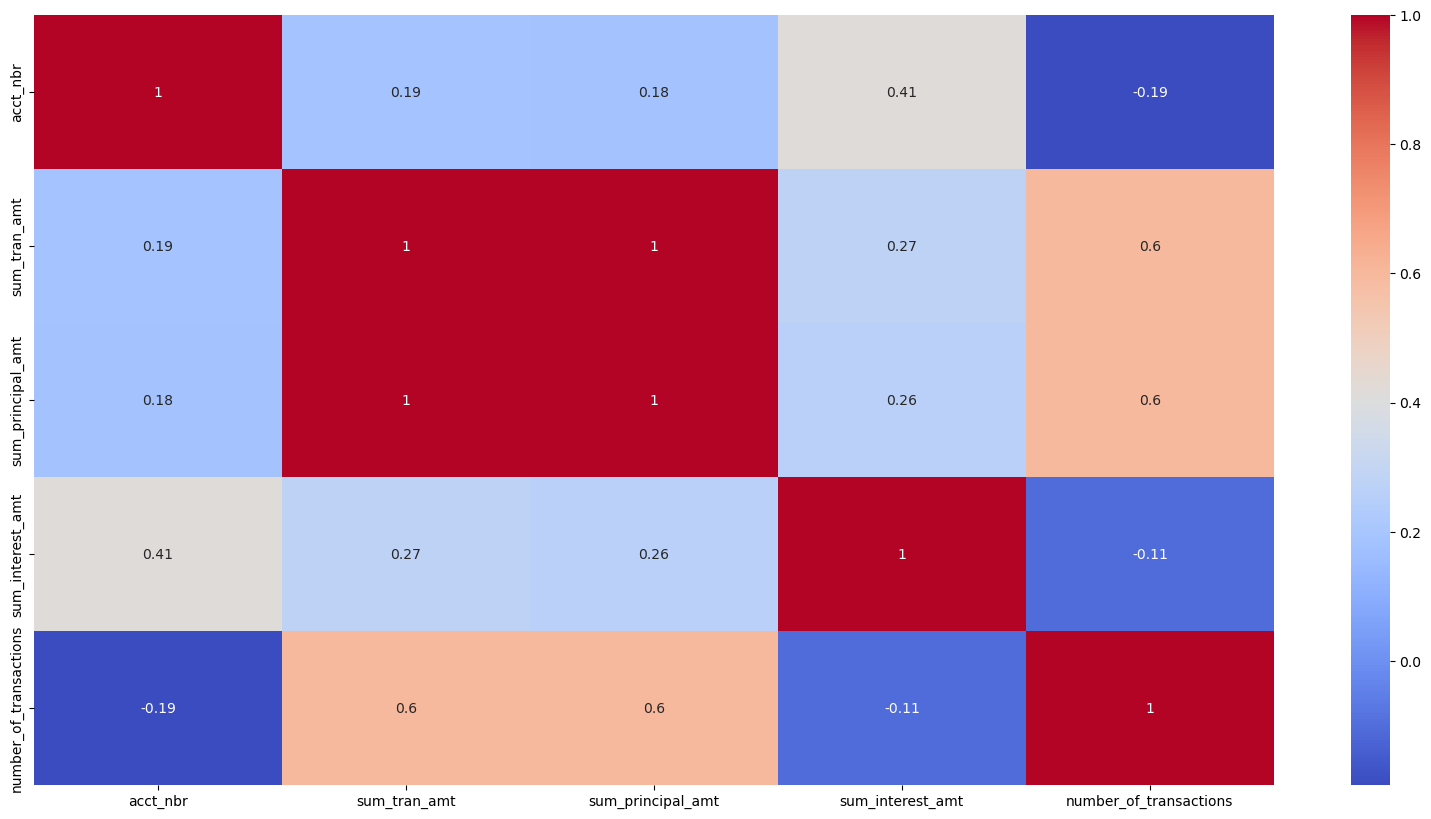

In [41]:
# correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


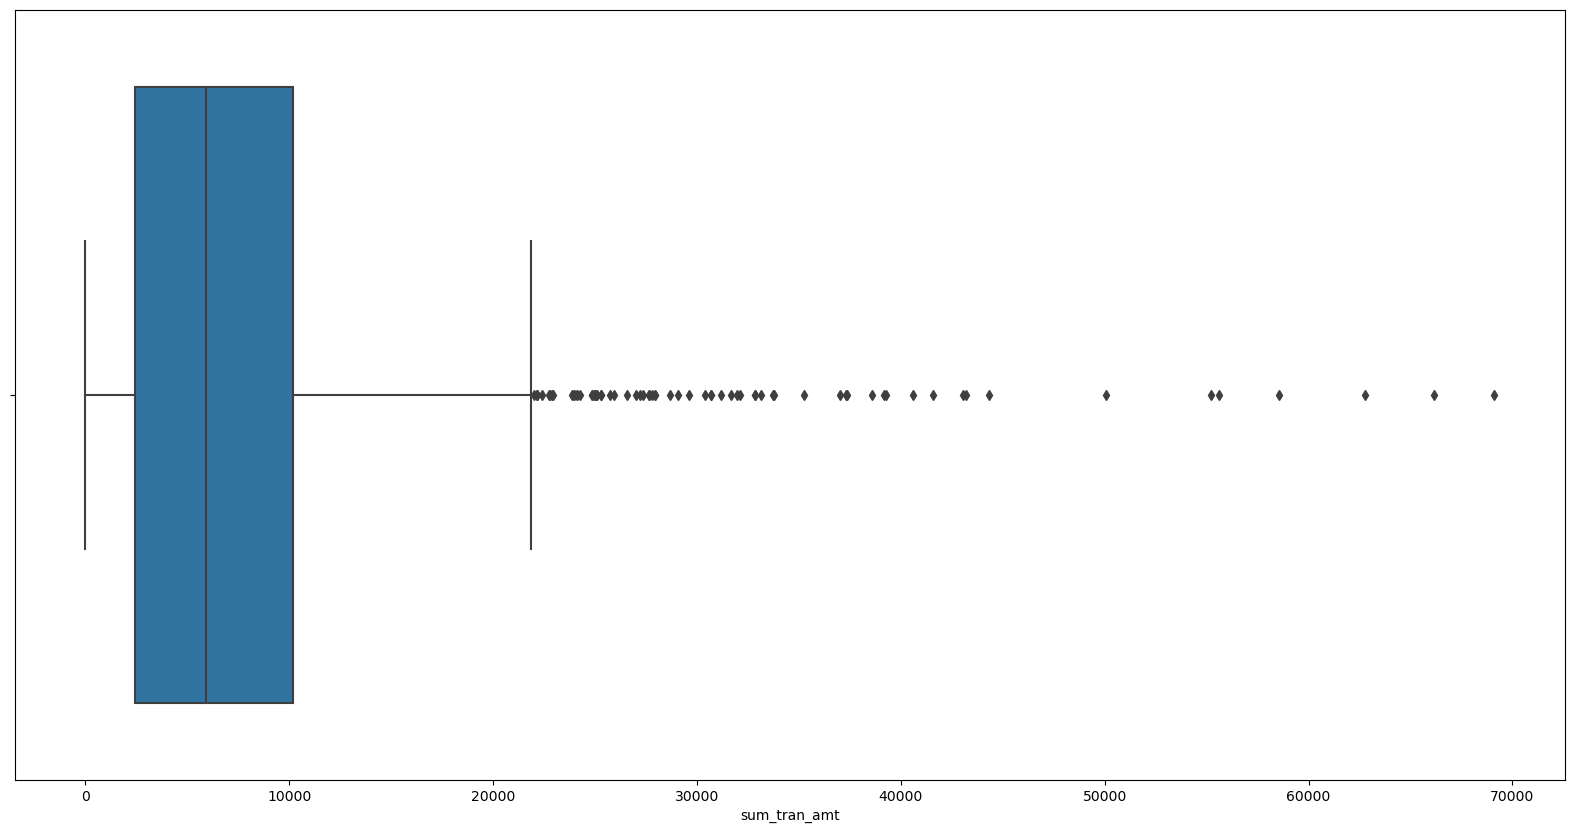

In [42]:
# box plot for sum_tran_amt
plt.figure(figsize=(20,10))
sns.boxplot(x='sum_tran_amt', data=df)
plt.show()


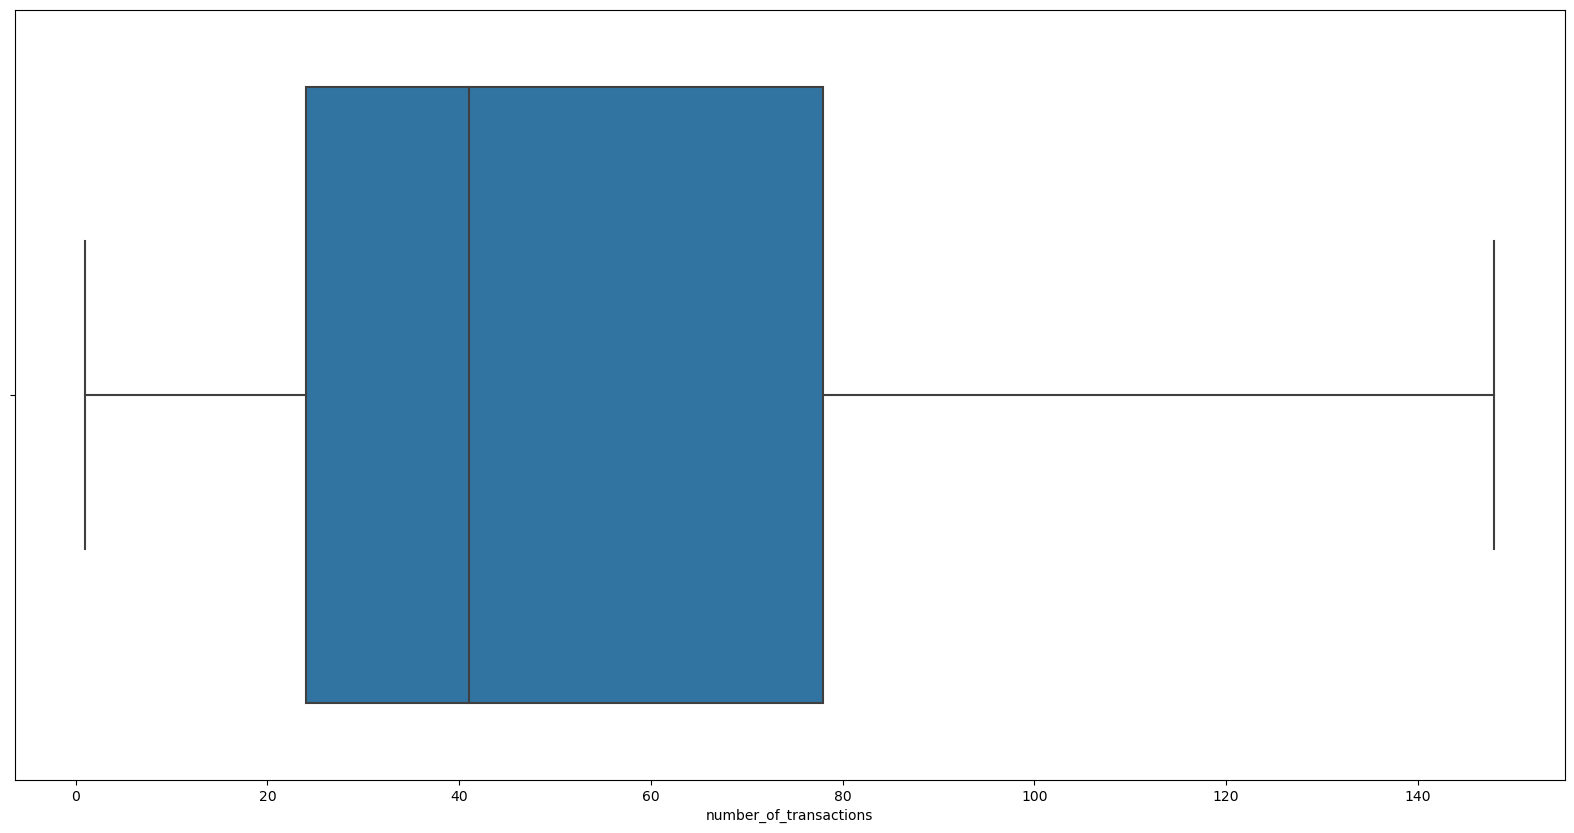

In [43]:
# box plot for number_of_transactions
plt.figure(figsize=(20,10))
sns.boxplot(x='number_of_transactions', data=df)
plt.show()


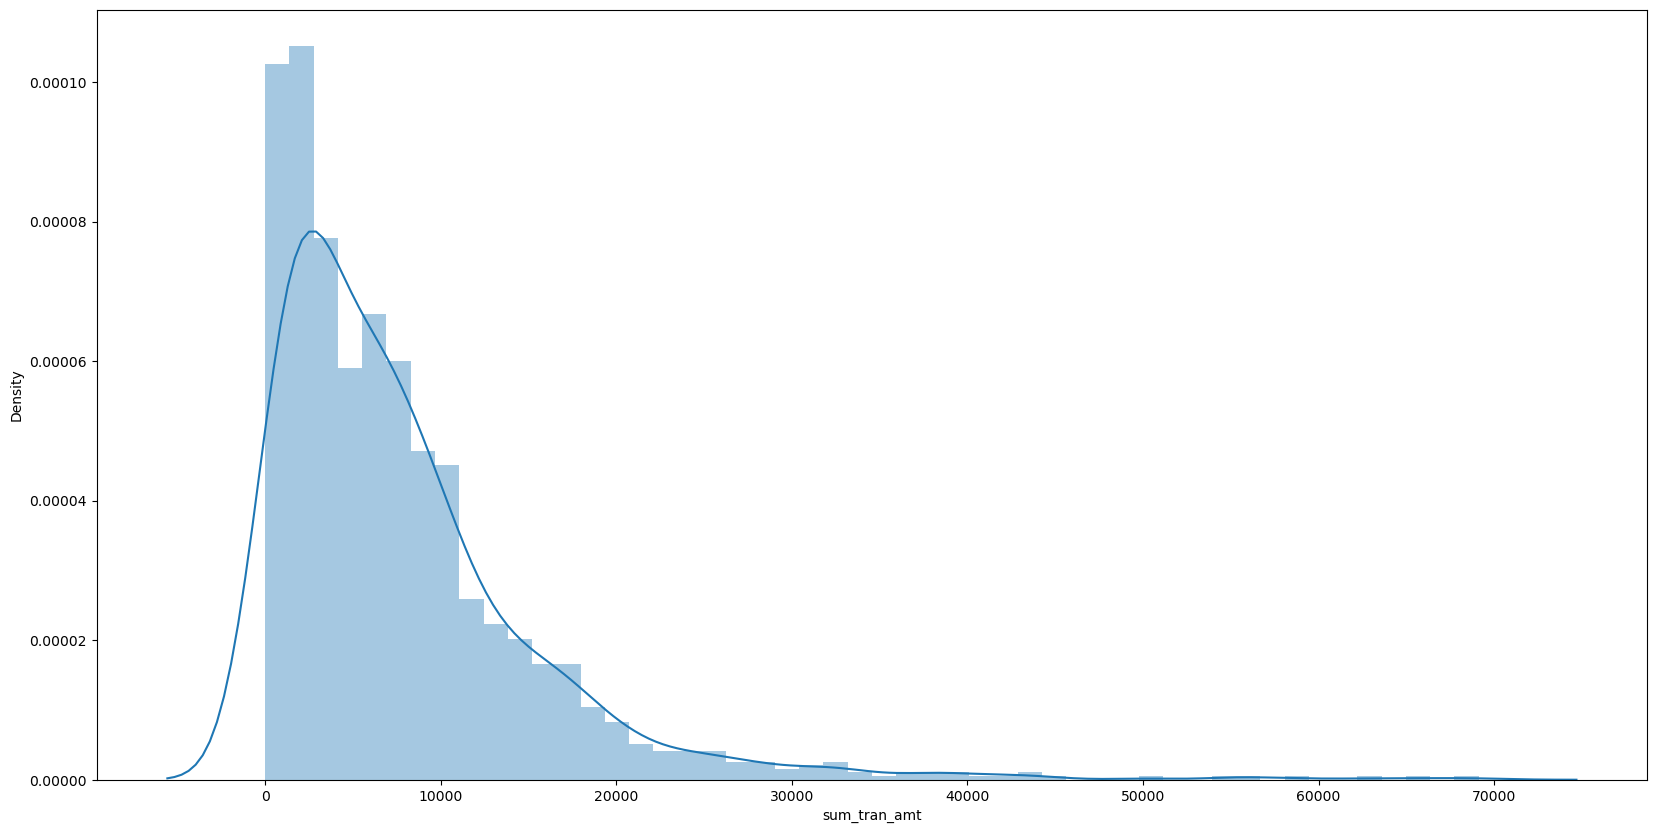

In [44]:
# plot histogram for sum_tran_amt
plt.figure(figsize=(20,10))
sns.distplot(df['sum_tran_amt'])
plt.show()


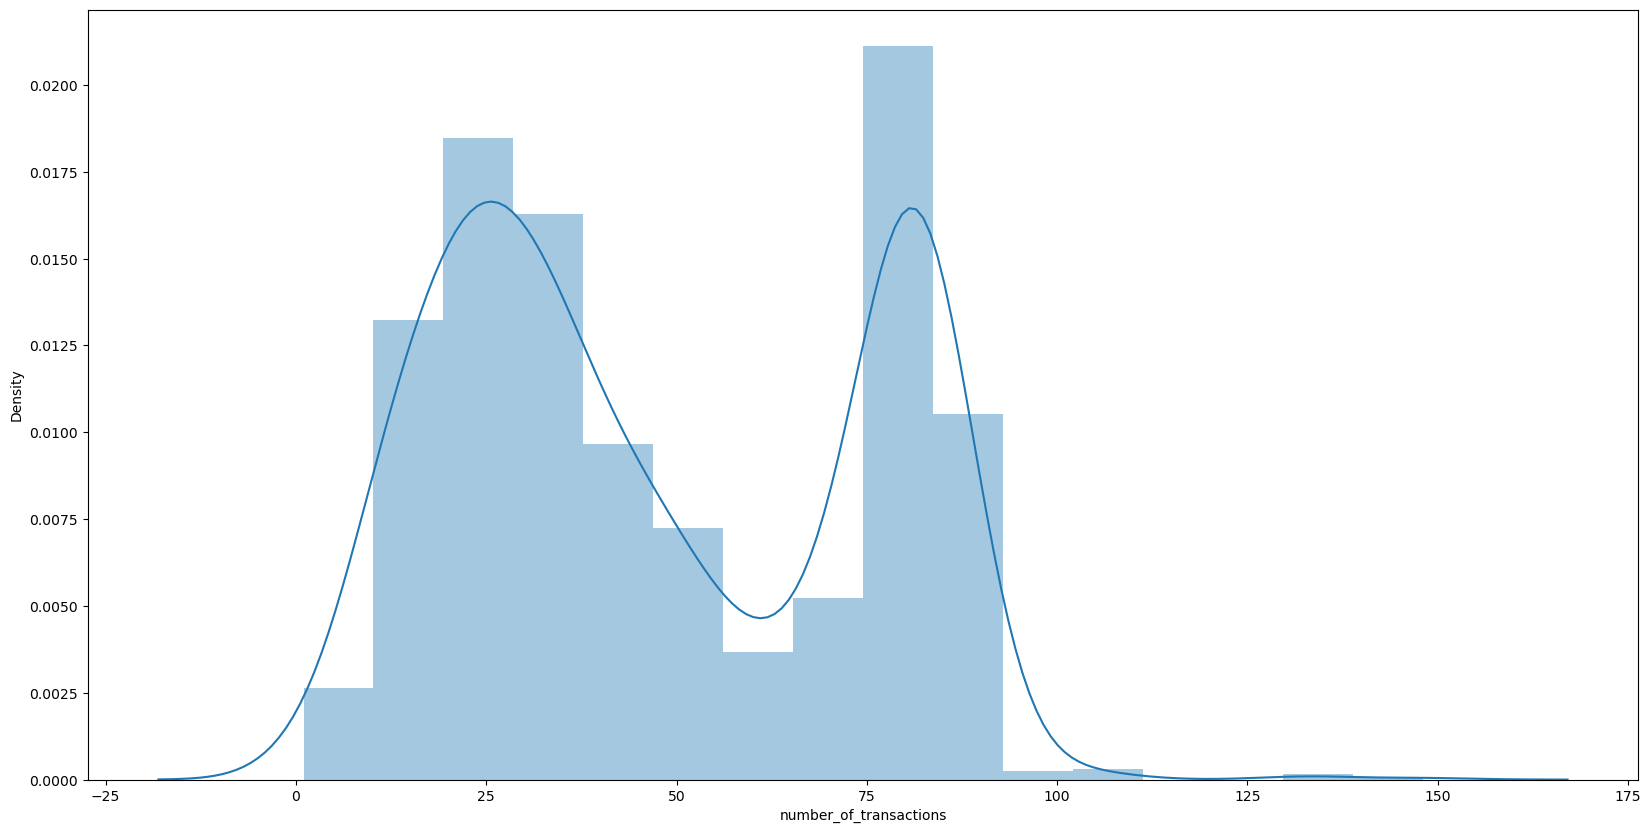

In [45]:
# histogram for number_of_transactions
plt.figure(figsize=(20,10))
sns.distplot(df['number_of_transactions'])
plt.show()


### Scaling 

In [46]:
df.head()

,acct_nbr,sum_tran_amt,sum_principal_amt,sum_interest_amt,number_of_transactions
2,13630842,15921.74,15884.71,37.03,78
3,13631412,5723.31,5723.31,0.00,81
5,13625032,6582.43,6568.03,14.40,80
6,13631642,6674.62,6674.62,0.00,87
7,4561143213634590,3801.53,3800.66,0.87,28


In [47]:
# drop acct_nbr column
df.drop('acct_nbr', axis=1, inplace=True)

In [48]:
# TODO:
#1. scale sum_tran_amt and number_of_transactions columns using StandardScaler
#2. use PCA to reduce the number of features to 2
#3. plot the PCA components


In [49]:
#1. scale sum_tran_amt and number_of_transactions columns using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[['sum_tran_amt', 'number_of_transactions', 'sum_principal_amt', 'sum_interest_amt']] = sc.fit_transform(df[['sum_tran_amt', 'number_of_transactions', 'sum_principal_amt', 'sum_interest_amt']])
df.head()

,sum_tran_amt,sum_principal_amt,sum_interest_amt,number_of_transactions
2,1.032618,1.036560,-0.057195,1.119723
3,-0.258770,-0.254219,-0.454561,1.230734
5,-0.149983,-0.146917,-0.300036,1.193730
6,-0.138309,-0.133377,-0.454561,1.452755
7,-0.502117,-0.498449,-0.445225,-0.730457


In [50]:
# Export to csv
df.to_csv('data/transactions_scaled.csv', index=False)